In [1]:
using DrWatson
quickactivate(@__DIR__)

using StatsBase
using Plots
using DataFrames
using CSV

In [2]:
res = DrWatson.collect_results(
        datadir("windsurfers-interactions-sims"),
        rinclude=[r"NumKargamma[.]*"]
        #   black_list = bl,
    )
first(res, 10)

┌ Info: Scanning folder /home/pgorski/Desktop/programming/curheider/PolarizationFramework/data/windsurfers-interactions-sims for result files.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:115
┌ Info: Added 212 entries.
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/result_collection.jl:191


,ode_fun_name,LP,LP_std,zmax,pos_links_changed_std,BR_std,GP
,String?,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?
1,Heider92!,0.742874,0.0471469,100,6.21282,0.0301771,0.7
2,Heider92!,0.747007,0.0405302,100,6.72021,0.0229069,0.82
3,Heider92!,0.740401,0.050305,100,6.19302,0.0257885,0.77
4,Heider92!,0.739544,0.044028,100,7.00051,0.0323816,0.61
5,Heider92!,0.737007,0.0457112,100,7.86438,0.0427018,0.5
6,Heider92!,0.729973,0.0513088,100,6.93708,0.0468138,0.46
7,Heider92!,0.726706,0.0470854,100,7.44474,0.0543231,0.31
8,Heider92!,0.724197,0.0490033,100,7.87408,0.0595878,0.26
9,Heider92!,0.703266,0.0528607,100,8.59836,0.0630157,0.14


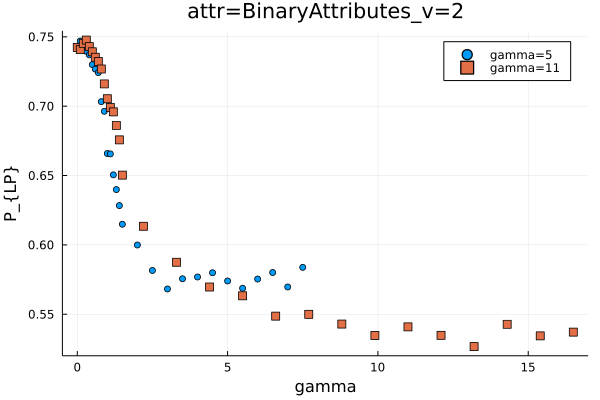

In [3]:
# N = 9
attr_name = "BinaryAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 2 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "gamma="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

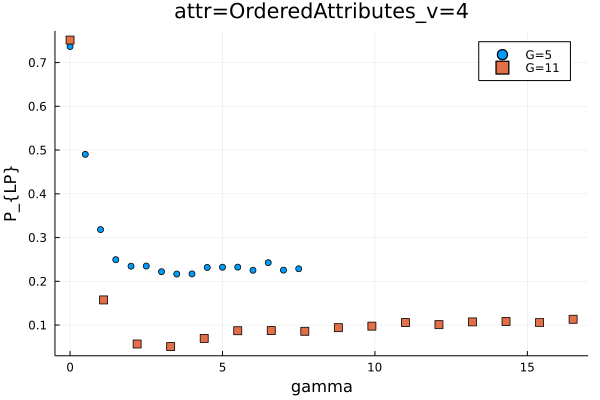

In [4]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

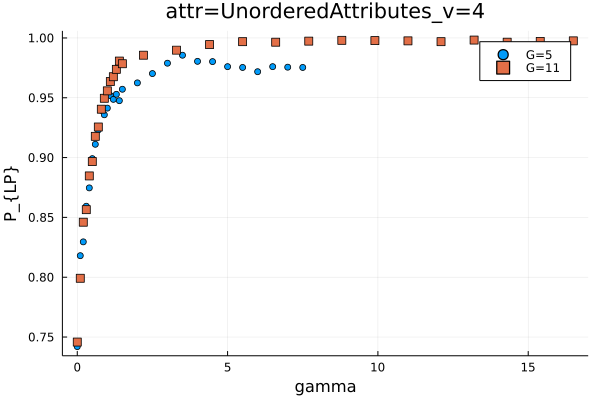

In [13]:
# N = 9
attr_name = "UnorderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

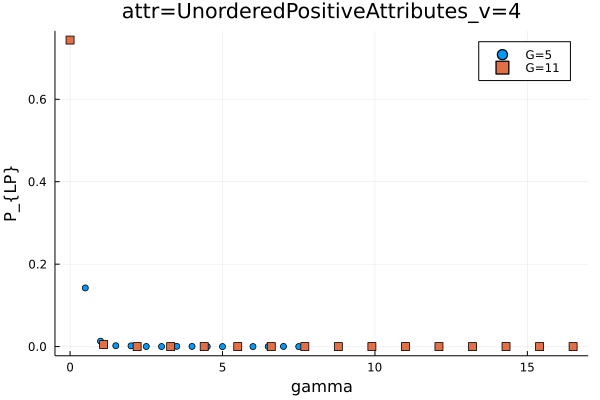

In [5]:
# N = 9
attr_name = "UnorderedPositiveAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 4 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))

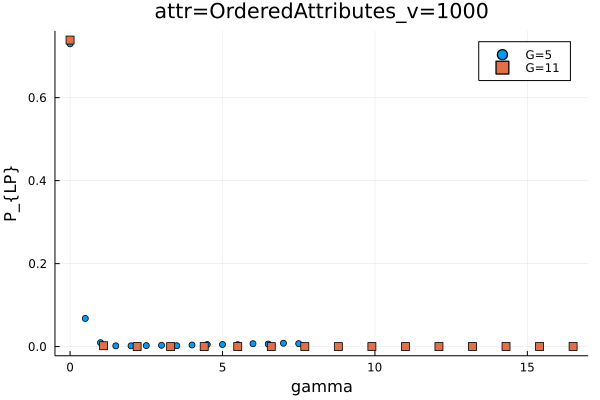

In [6]:
# N = 9
attr_name = "OrderedAttributes" # ["BinaryAttributes", "OrderedAttributes", "UnorderedAttributes", "UnorderedPositiveAttributes"]
gamma = unique(res.gamma)
attr_degeneracy = 1000 #It should be 2 for BA, 1000 for CA (OrderedAttributes). Otherwise 4. 
G = unique(res.G)

params = @strdict attr_name G attr_degeneracy
dicts = dict_list(params)

markers = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]

p = plot()
for (i, dict) in enumerate(dicts)
    inds = ones(Bool, size(res)[1])

    for param in dict
        inds .*= res[!, string(param[1])] .== param[2]
    end

    plot!(p, res.gamma[inds], res.LP[inds], seriestype=:scatter, markershape = markers[i], lab = "G="*string(dict["G"]))
end

plot(p, xlabel = "gamma", ylabel = "P_{LP}", legend = :best)
attr = attr_name
v = attr_degeneracy
title!(savename(@ntuple(attr, v)))